In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

E:\python 3.5\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# 股市价格可视化

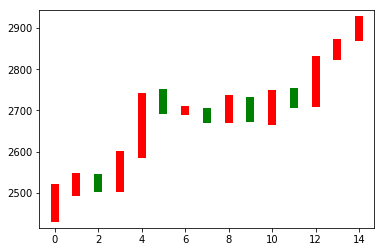

In [42]:
date = np.linspace(1,15,15)
endPrice = np.array([2511.90,2538.26,2510.68,2591.66,2732.98,2701.69,2701.29,2678.67,2726.50,2681.50,2739.17,2715.07,2823.58,2864.90,2919.08]
)
beginPrice = np.array([2438.71,2500.88,2534.95,2512.52,2594.04,2743.26,2697.47,2695.24,2678.23,2722.13,2674.93,2744.13,2717.46,2832.73,2877.40])
for i in range(0,15):
    #画柱状图显示目前的股市价格
    dataone = np.zeros([2])
    dataone[0] = i
    dataone[1] = i
    priceone = np.zeros([2])
    priceone[0] = beginPrice[i]
    priceone[1] = endPrice[i]
    if priceone[0] > priceone[1]:
        plt.plot(dataone,priceone,'g',lw = 8)
    else:
        plt.plot(dataone,priceone,'r',lw = 8)


In [43]:
dataNormal = np.zeros([15,1])
priceNormal = np.zeros([15,1])

#规范化
for i in range(0,15):
    dataNormal[i,0] = i / 14.0
    priceNormal[i,0] =  endPrice[i] / 3000.0
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])
# B
w1 = tf.Variable(tf.random_uniform([1,10],0,1))
b1 = tf.Variable(tf.zeros([1,10]))
wb1 = tf.matmul(x,w1)+b1
layer1 = tf.nn.relu(wb1)# 激励函数
# C
w2 = tf.Variable(tf.random_uniform([10,1],0,1))
b2 = tf.Variable(tf.zeros([15,1]))
wb2 = tf.matmul(layer1,w2)+b2
layer2 = tf.nn.relu(wb2)
#计算与实际差别
loss = tf.reduce_mean(tf.square(y-layer2))
#梯度下降求最小损失
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

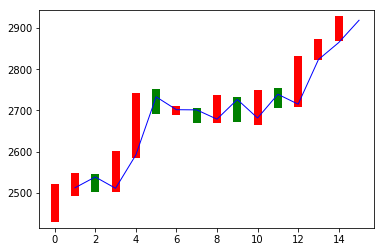

In [45]:
for i in range(0,15):
    #画柱状图显示目前的股市价格
    dataone = np.zeros([2])
    dataone[0] = i
    dataone[1] = i
    priceone = np.zeros([2])
    priceone[0] = beginPrice[i]
    priceone[1] = endPrice[i]
    if priceone[0] > priceone[1]:
        plt.plot(dataone,priceone,'g',lw = 8)
    else:
        plt.plot(dataone,priceone,'r',lw = 8)
sess = tf.Session()
with sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        sess.run(train_step,feed_dict={x:dataNormal,y:priceNormal})
    pred = sess.run(layer2,feed_dict={x:dataNormal})
    predPrice = np.zeros([15,1])
    for i in range(0,15):
        predPrice[i,0]=(pred*3000)[i,0]
    plt.plot(date,predPrice,'b',lw=1)
plt.show()